Here is a clustering analysis for a dataset on a given variable (location in lat and lng)

The clustering will allow analysis for the dataset subset by another giver variable (eg genre, bpm, dancability, age restriction)

In [2]:
import json
from pandas.io.json import json_normalize

In [3]:
#first load necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [4]:
#now import DBSCAN clustering package
from sklearn.cluster import DBSCAN

In [5]:
from sklearn import metrics

It will not be necessary to standardise any of the data as the clustering is spatial and therefore already similar in scale

Now it is neccesary to load in the data to test

In [8]:
#load in the data to be used
json_file = open("London_(2018-04-15)_page-1.json")

In [9]:
#now get only json data out
json_data = json.load(json_file)

In [10]:
#create column names
columns = ['lat', 'lng', 'venuename', 'eventname', 'agerestriction']

In [11]:
#get total results for the json file
totalEntries = json_data['resultsPage']['totalEntries']

In [12]:
#create index
index = range(0, totalEntries - 1)

In [13]:
#create the total dataframe
allLocationFrame = pd.DataFrame(columns=columns)

In [14]:
#create the changing dataframe
locationFrame = pd.DataFrame(index=index, columns=columns)

In [15]:
#for loop to create the new dataframe
for i in index:
    locationFrame['lat'][i] = json_data['resultsPage']['results']['event'][i]['location']['lat']
    locationFrame['lng'][i] = json_data['resultsPage']['results']['event'][i]['location']['lng']
    locationFrame['venuename'][i] = json_data['resultsPage']['results']['event'][i]['venue']['displayName']
    locationFrame['eventname'][i] = json_data['resultsPage']['results']['event'][i]['displayName']
    locationFrame['agerestriction'][i] = json_data['resultsPage']['results']['event'][i]['ageRestriction']

In [16]:
allLocationFrame = pd.concat([allLocationFrame, locationFrame])

In [17]:
allLocationFrame

,lat,lng,venuename,eventname,agerestriction
0,51.5034,-0.1174,"Royal Festival Hall, Southbank Centre",Esa-Pekka Salonen and Philharmonia Orchestra w...,None
1,51.5235,-0.1442,229,"Sonny Landreth at 229 (April 15, 2018)",18+
2,51.5074,-0.1278,Unknown venue,"Fairytape at Unknown venue (April 15, 2018)",None
3,51.5325,-0.3231,St Mary's Church,"Ashley Fripp at St Mary's Church (April 15, 2018)",None
4,51.5387,-0.1431,The Jazz Cafe,Peter Broderick with Hatis Noit at The Jazz Ca...,None
5,51.5346,-0.1383,KOKO,"aston merrygold at KOKO (April 15, 2018)",None
6,51.5344,-0.1088,The Islington,James Elkington with William Patrick Owen at T...,None
7,51.5034,-0.1174,"Royal Festival Hall, Southbank Centre",Philharmonia Orchestra and Vito Žuraj with Joa...,None
8,51.5011,0.0017,Indigo at The O2,"Serkan Kaya at Indigo at The O2 (April 15, 2018)",None
9,51.5870,-0.0204,Ye Olde Rose & Crown Theatre Pub,Peter Struijk and Najma Akhtar at Ye Olde Rose...,None


In [ ]:
#append new frame to the total

In [46]:
#get just locations

locationsOnly = allLocationFrame.iloc[:,0:2]

In [47]:
locationsOnly

,lat,lng
0,51.5034,-0.1174
1,51.5235,-0.1442
2,51.5074,-0.1278
3,51.5325,-0.3231
4,51.5387,-0.1431
5,51.5346,-0.1383
6,51.5344,-0.1088
7,51.5034,-0.1174
8,51.5011,0.0017
9,51.5870,-0.0204


In [88]:
#create new dbscan cluster object
dbscan = DBSCAN(eps=0.02, min_samples=3)

In [89]:
dbscan1stRun = dbscan.fit(locationsOnly)

In [90]:
#get the labels of the groups
dbscan_labels = dbscan.labels_

In [79]:
dbscan_labels

array([ 0, -1,  1, -1,  2, -1, -1,  0, -1, -1, -1, -1,  2, -1, -1,  2, -1,
       -1,  1, -1, -1,  3, -1,  2, -1,  3, -1,  2,  3,  3,  1,  1, -1, -1,
       -1, -1,  4, -1, -1, -1, -1, -1, -1, -1, -1,  4, -1,  4, -1,  0],
      dtype=int64)

In [91]:
locationsOnly['dbscanLabels1'] = pd.DataFrame(dbscan_labels)

C:\Users\Alfie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [81]:
locationsOnly.dtypes

lat              float64
lng              float64
dbscanLabels1      int64
dtype: object

In [66]:
locationsOnly['lat'] = pd.to_numeric(locationsOnly['lat'])

C:\Users\Alfie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [68]:
locationsOnly['lng'] = pd.to_numeric(locationsOnly['lng'])

C:\Users\Alfie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
locationsOnly

,lat,lng,dbscanLabels1
0,51.5034,-0.1174,0
1,51.5235,-0.1442,-1
2,51.5074,-0.1278,1
3,51.5325,-0.3231,-1
4,51.5387,-0.1431,2
5,51.5346,-0.1383,-1
6,51.5344,-0.1088,-1
7,51.5034,-0.1174,0
8,51.5011,0.0017,-1
9,51.5870,-0.0204,-1


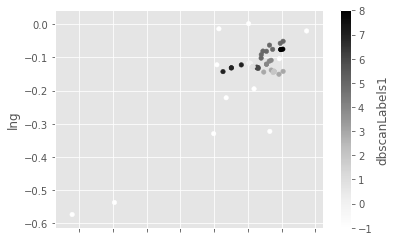

In [92]:
locationsOnly.plot.scatter(y='lng', x='lat', c='dbscanLabels1')

In [93]:
#now get folium
# specifies default number format to 4 decimal places
pd.options.display.float_format = '{:40,.4f}'.format 

# specifies that graphs should use ggplot styling
plt.style.use('ggplot') 
%matplotlib inline

import folium

In [96]:
#get a random lcation for where to start
locationsOnly.iloc[1]

lat                                              51.5235
lng                                              -0.1442
dbscanLabels1                                     3.0000
Name: 1, dtype: float64

In [99]:
#make a quick map of clustering

map = folium.Map(location = [51.5235, -0.1442],
                 zoom_start=10)

In [100]:
map

In [107]:
#now add the clusters and locations
colors = {'-1' : 'red', '0' : 'blue', '1' : 'green', '1' : 'purple', '2' : 'pink', '3' : 'yellow', '4' : 'grey', '5': 'black', '6' : 'white', '7' :   }

locationsOnly.apply(lambda row:folium.CircleMarker(location=[row["lat"], row["lng"]], 
                                              radius=10, color=row['dbscanLabels1'])
                                             .add_to(map), axis=1)


0     <folium.features.CircleMarker object at 0x0000...
1     <folium.features.CircleMarker object at 0x0000...
2     <folium.features.CircleMarker object at 0x0000...
3     <folium.features.CircleMarker object at 0x0000...
4     <folium.features.CircleMarker object at 0x0000...
5     <folium.features.CircleMarker object at 0x0000...
6     <folium.features.CircleMarker object at 0x0000...
7     <folium.features.CircleMarker object at 0x0000...
8     <folium.features.CircleMarker object at 0x0000...
9     <folium.features.CircleMarker object at 0x0000...
10    <folium.features.CircleMarker object at 0x0000...
11    <folium.features.CircleMarker object at 0x0000...
12    <folium.features.CircleMarker object at 0x0000...
13    <folium.features.CircleMarker object at 0x0000...
14    <folium.features.CircleMarker object at 0x0000...
15    <folium.features.CircleMarker object at 0x0000...
16    <folium.features.CircleMarker object at 0x0000...
17    <folium.features.CircleMarker object at 0x

In [108]:
map